# **Mini Project (UTS) - Pembelajaran Mendalam Teknik Elektro**
## **Mall Customer Segmentation Analysis**

### **Kelompok 4**
**Anggota:**
1. **Syifa Amara Dhestyani** — *Data Understanding & Preprocessing*  
2. **Hikmah Nisyah** — *Exploratory Data Analysis (EDA) & Visualisasi*  
3. **Rizky Araffathia** — *Modeling & Clustering*  
4. **Tania Nurindini** — *Evaluasi, Profiling Cluster & Insights Bisnis*  


### **Deskripsi Proyek**
Proyek ini bertujuan untuk melakukan **segmentasi pelanggan pusat perbelanjaan (mall)** menggunakan metode *unsupervised learning* dengan algoritma **K-Means Clustering**.  
Melalui analisis data pelanggan berdasarkan usia, pendapatan tahunan, dan skor pengeluaran, proyek ini membantu dalam **mengidentifikasi pola perilaku konsumen**, **membangun strategi pemasaran yang lebih tepat sasaran**, serta **meningkatkan efisiensi bisnis** melalui pemahaman karakteristik tiap segmen pelanggan.


## **Data Understanding & Preprocessing**

**Assigned to:** Syifa Amara Dhestyani




**Data Understanding**

**Connect to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note :** Untuk mengambil dataset dari Google Drive untuk analisis atau pelatihan model.

**Add your file path**

In [3]:
cd /content/drive/MyDrive/DEEPL

/content/drive/MyDrive/DEEPL


**Note :** Mengambil data dari lokasi dataset atau folder penyimpanan dataset, sehingga dapat bekerja langsung di dalam folder tersebut dari colab.

**Importing Libraries**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

**Note :** Menyiapkan semua librari utama yang dibutuhkan dalam analisis data, visualisasi, dan machine learning, juga mengatur agar lingkungan kerja bersih dan siap untuk proses eksplorasi data, clustering, atau visualisasi interaktif.

### **Exploration of Data**

**Load dataset**

In [5]:
df = pd.read_csv('Mall_Customers.csv')

**Note :** Memasukkan dataset ke dalam memori python agar bisa dianalisis, divisualisasikan, atau diolah lebih lanjut.

**Display first 10 rows**

In [6]:
print("Data Sample:")
df.head(10)

Data Sample:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


**Note :** Melihat isi awal dataset (apakah file berhasil dibaca), mengenal struktur data dan memahami makna tiap kolom, dan menjadi dasar sebelum tahap preprocessing atau visualisasi data pelanggan.

**Basic dataset information**

In [7]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Note :** *200 non-null” berarti semua 200 baris punya data valid (tidak ada yang kosong) di kolom tersebut.*

Melihat info dataset, terdapat 200 baris dan 5 kolom, tidak ada missing value, kolom Gender adalah kategori, sedangkan kolom lainnya numerik, dan dataset ini siap untuk dianalisis tanpa perlu pembersihan data yang berat.

**Statistical description**

In [8]:
print("\nData Description:")
df.describe()


Data Description:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Note :** Menampilkan statistik deskriptif dari kolom numerik pada dataset, jumlah data, rata-rata, standar deviasi, nilai minimum, maksimum dan kuartil (25%, 50%, 75%).

**Data types for each column**

In [9]:
print("\nData Types:")
df.dtypes


Data Types:


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


**Note :** Untuk menampilkan dan mengetahui tipe data tiap kolom agar bisa menentukan langkah preprocessing berikutnya.

**Check missing values**

In [10]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Note :** Mengecek apakah ada data yang hilang (missing values / NaN) pada setiap kolom di DataFrame.

**Dataset shape**

In [11]:
print("Dataset shape (rows, columns):")
df.shape

Dataset shape (rows, columns):


(200, 5)

### **Data Preparation (Preprocessing)**

**Encode Gender (Male=1, Female=0)**

In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(f"\nGender Encoding: {le.classes_} -> {le.transform(le.classes_)}")


Gender Encoding: ['Female' 'Male'] -> [0 1]


**Note :** Mengubah kategori data dari Gender menjadi Numerik.


**Normalize data**



In [13]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**Note :** Menyiapkan dua set data (x2 dan x3) dengan kombinasi fitur yang berbeda untuk digunakan pada analisis lanjut.


In [14]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X3_scaled = scaler.fit_transform(X3)

**Note :** Menstandarkan fitur agar memiliki skala yang sama, sehingga algoritma K-means bisa bekerja dengan akurat dan tidak terjadi bias terhadap fitur dengan nilai besar.

In [15]:
print("\n3-feature data after normalization (sample):")
pd.DataFrame(X3_scaled, columns=X3.columns).head()


3-feature data after normalization (sample):


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


**Note :** Menampilkan hasil scaling dari dataset dengan 3 fitur, untuk memastikan bahwa semua fitur telah memiliki skala yang seimbang sebelum digunakan pada clustering.

## **Data Visualization (EDA)**

**Assigned to:** Hikmah Nisya




**style plot 'fivethirtyeight'**

In [16]:
plt.style.use('fivethirtyeight')

**Note :** Untuk mengatur gaya tampilan (style) grafik pada library Matplotlib agar tampil seperti visualisasi data dari situs FiveThirtyEight, gaya grafik yang modern, bersih dan profesional. Tanpa perlu mengatur warna atau gaya secara manual.

**Gender distribution**

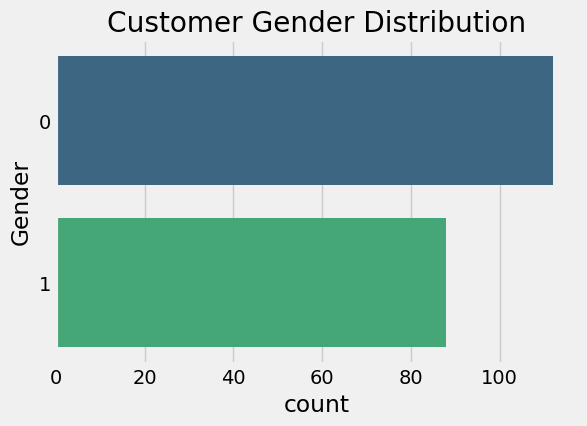

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(y='Gender', data=df, palette='viridis')
plt.title('Customer Gender Distribution')
plt.show()

**Note :** Untuk menampilkan distribusi jumlah pelanggan berdasarkan jenis kelamin.

**Histplot for Age distribution**

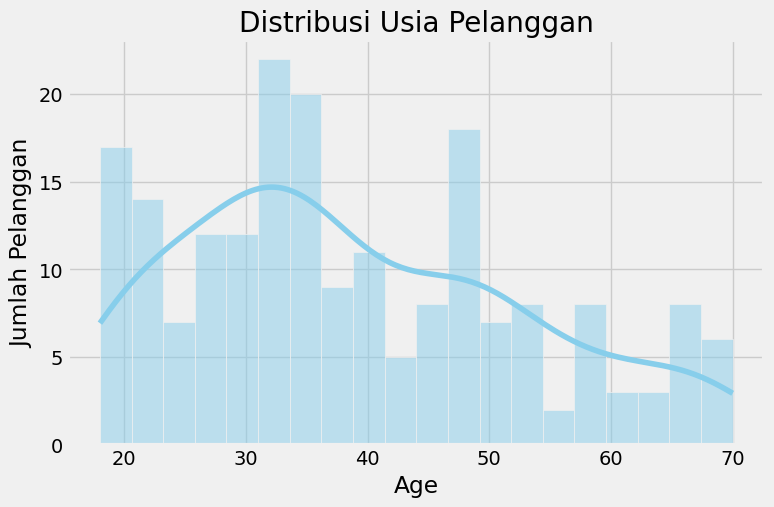

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Age')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Note :** Menampilkan distribusi usia pelanggan dalam bentuk histogram dengan kurva KDE (Kernel Density Estimation), untuk melihat pola sebaran umur pelanggan, apakah terkonsentrasi pada usia tertentu, merata, atau 2 puncak (bimodal).

**Annual Income Distribution Histogram**


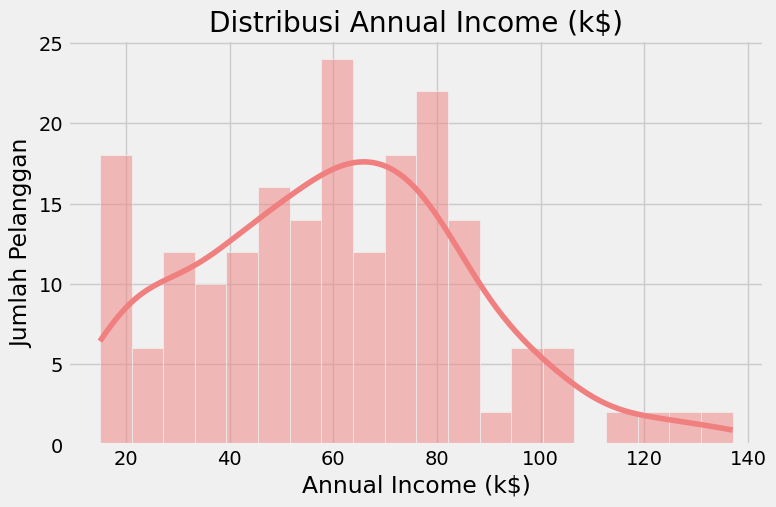

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='lightcoral')
plt.title('Distribusi Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Note :** Menampilkan distribusi pendapatan tahunan pelanggan (k$) dalam bentuk histogram + kurva KDE. Untuk melihat pola penyebaran pendapatan, rendah, menengah, atau tinggi.

**Spending Score Distribution Histogram**

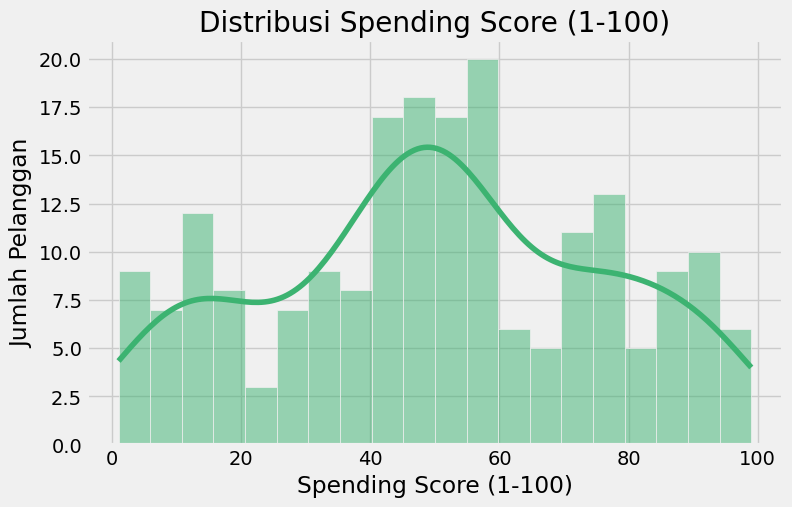

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='mediumseagreen')
plt.title('Distribusi Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Note :** Menampilkan distribusi nilai spending score pelanggan, score yang menggambarkan seberapa besar pelanggan cenderung membelanjakan uangnya. Semakin tinggi nilainya, semakin aktif pelanggan tersebut dalam berbelanja.

**Scatter Age vs Spending Score**

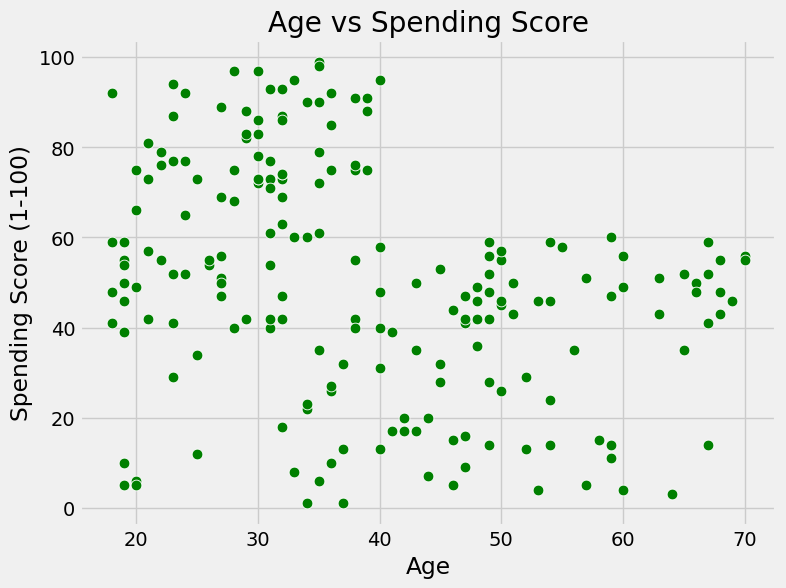

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, s=60, color='green')
plt.title('Age vs Spending Score')
plt.show()

**Note :** Melihat hubungan antara Age dan Spending Score pelanggan.

**Scatter Annual Income vs Spending Score**

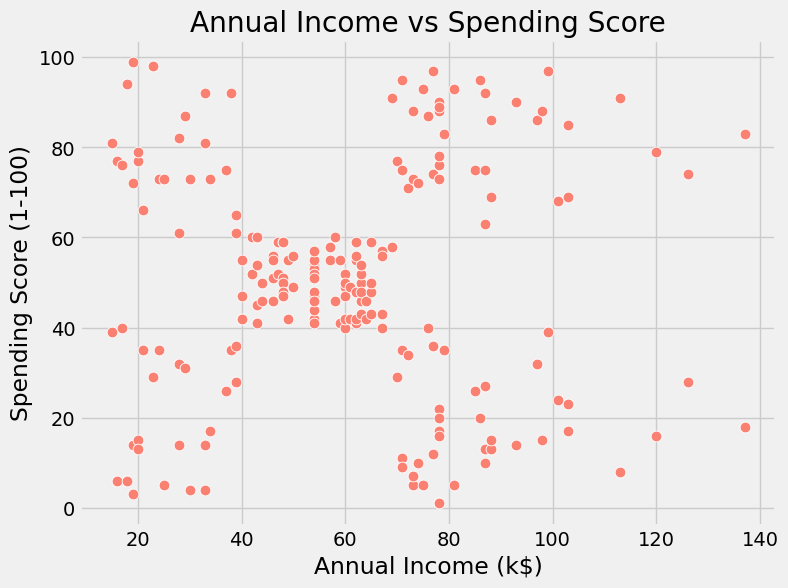

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, color='salmon')
plt.title('Annual Income vs Spending Score')
plt.show()

**Note :** Menunjukkan hubungan antara pendapatan tahunan dan spending score. Melihat perilaku pelanggan berdasarkan dua faktor ekonomi, pendapatan dan keaktifan berbelanja.

**Correlation Heatmap**

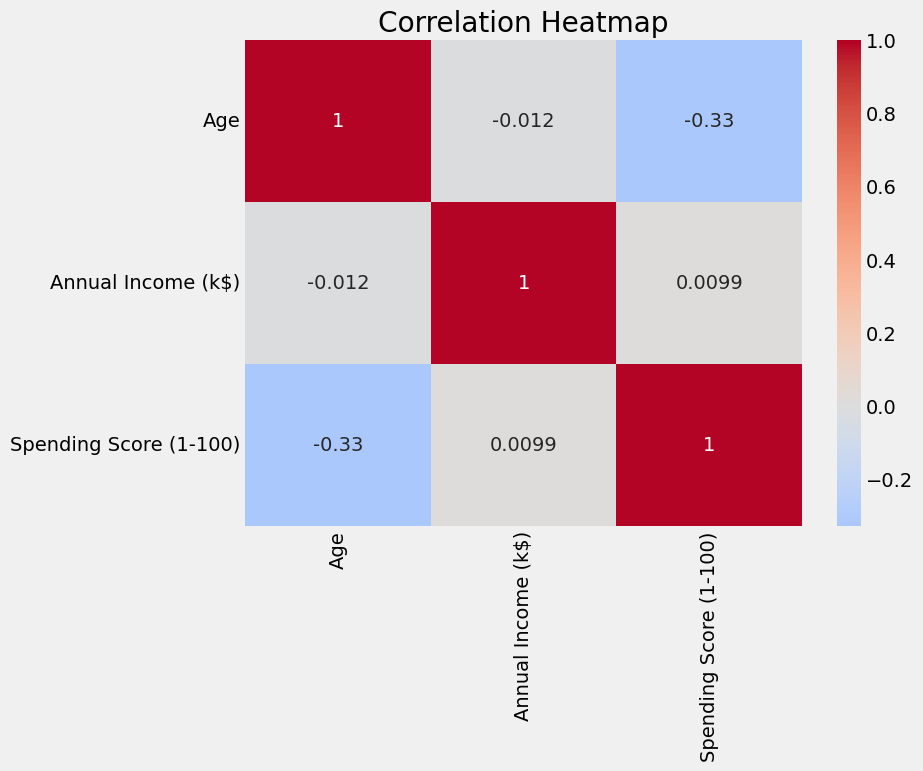

In [23]:
plt.figure(figsize=(8, 6))
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**Note :** Menampilkan hubungan antar 3 variabel (Age, Annual Income, Spending Score) untuk dipahami hubungannya sebelum dilakukan analisis (clustering).

**Scatter Age vs Spending by Gender**

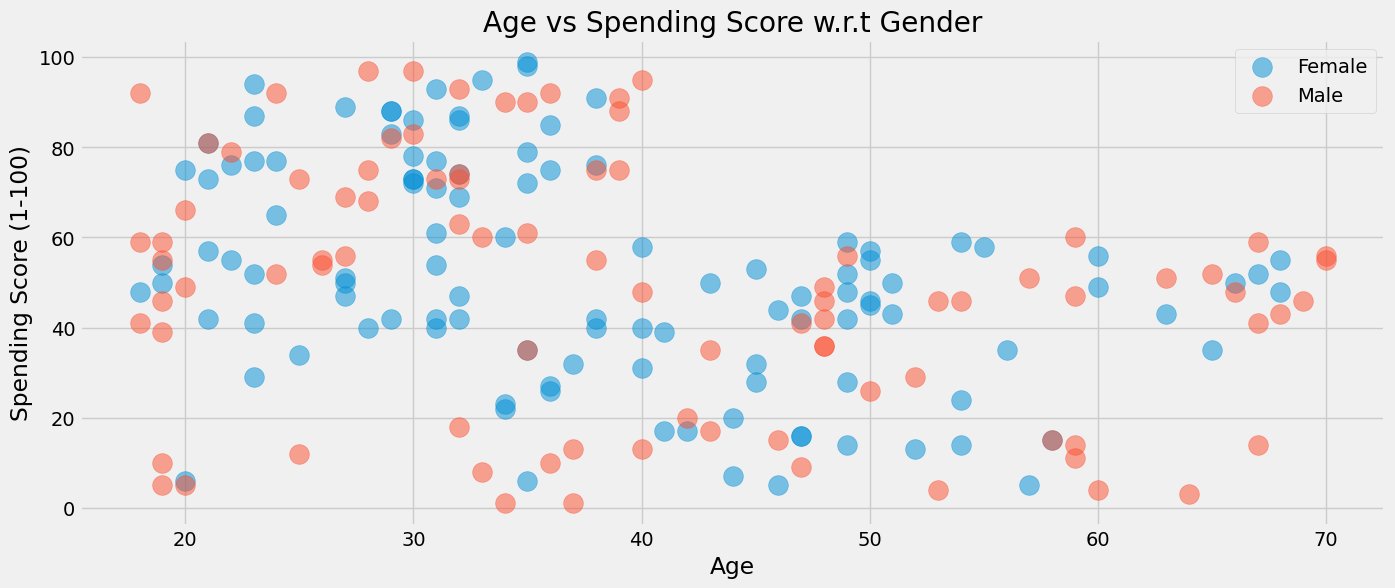

In [24]:
plt.figure(1 , figsize = (15 , 6))
for gender_code in [0, 1]:
    gender_label = 'Female' if gender_code == 0 else 'Male'
    plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender_code] ,
                s = 200 , alpha = 0.5 , label = gender_label)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Note :** Membandingkan distribusi age dengan spending score berdasarkan gender.

**Scatter Income vs Spending by Gender**




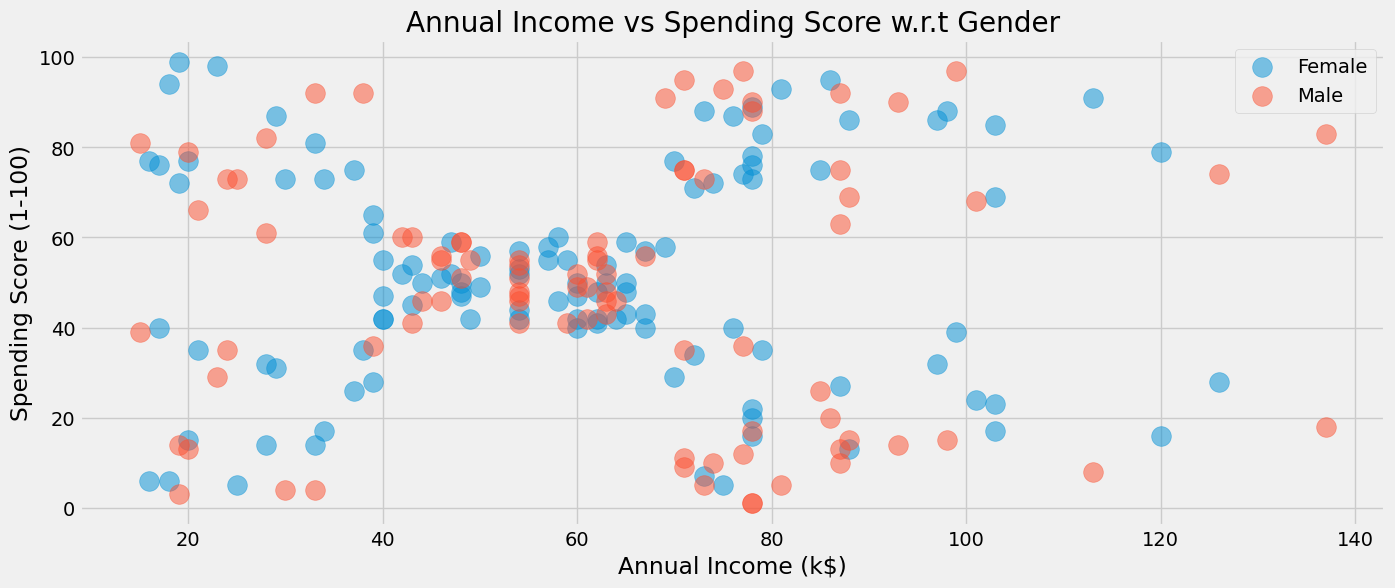

In [25]:
plt.figure(1 , figsize = (15 , 6))
for gender_code in [0, 1]:
    gender_label = 'Female' if gender_code == 0 else 'Male'
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender_code] ,s = 200 , alpha = 0.5 , label = gender_label)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Note :** Analisis hubungan antara annual income dengan spending score berdasarkan gender.

## **Modeling & Clustering**


**Assigned to:** Rizky Araffathia


**Selection of Clusters (Elbow Method)**

In [26]:
def plot_elbow(X, title):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(
            n_clusters=k,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            random_state=42
        )
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(7, 5))
    plt.plot(np.arange(1, 11), inertias, 'o-')
    plt.title(f'Elbow Method - {title}', fontsize=10)
    plt.xlabel('Number of Clusters', fontsize=9)
    plt.ylabel('Inertia', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return inertias


**Note :** Mencari jumlah cluster optimal (nilai k) menggunakan metode Elbow, dengan melihat grafik perubahan nilai inertia dari k=1 hingga k=10.

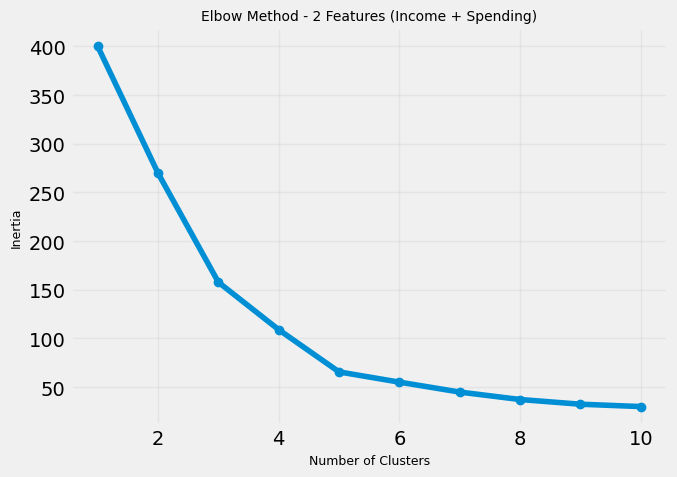

In [27]:
inertia2 = plot_elbow(X2_scaled, '2 Features (Income + Spending)')

**Note :** Menentukan jumlah cluster terbaik sebelum menjalankan proses kmeans.

In [28]:
inertia2

[399.99999999999994,
 269.69101219276405,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.86475569922555,
 37.22818767758587,
 32.39226763033118,
 29.981897788243703]

**Note :** Fitur yang digunakan untuk beberapa jumlah culster. Nilainya menurun karena banyaknya cluster. Ini digunakan untuk menentukan jumlah cluster optimal.

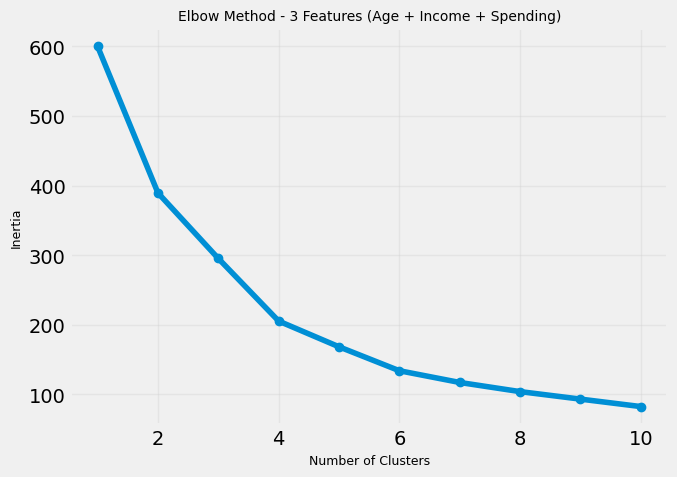

In [29]:
inertia3 = plot_elbow(X3_scaled, '3 Features (Age + Income + Spending)')


**Note :** Menghitung dan plot nilai inertia33 untuk menentukan jumlah cluster optimal.

In [30]:
inertia3

[599.9999999999999,
 389.38618895643714,
 295.21224615554877,
 205.22514747675913,
 168.2475801755683,
 133.86842085478855,
 117.01155455889815,
 103.87329152383714,
 93.0928911004172,
 82.38515364526597]

**Note :** Fitur yang digunakan untuk beberapa jumlah culster. Nilainya menurun karena banyaknya cluster. Ini digunakan untuk menentukan jumlah cluster optimal.

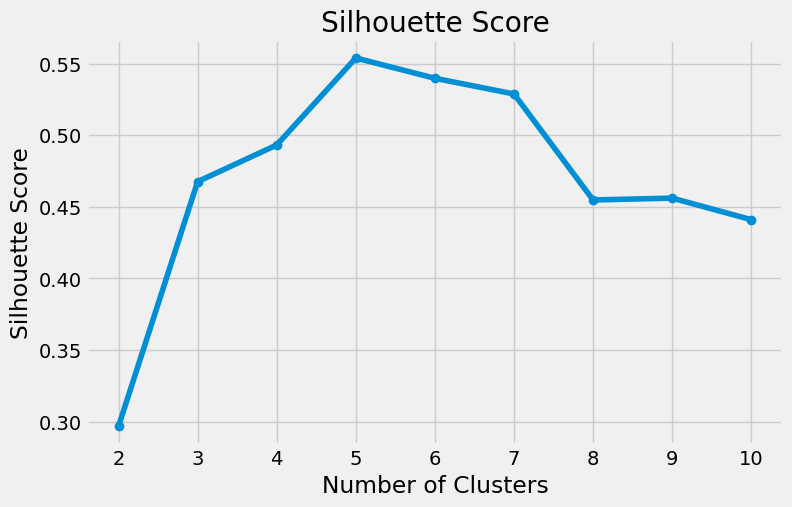

Optimal K: 5


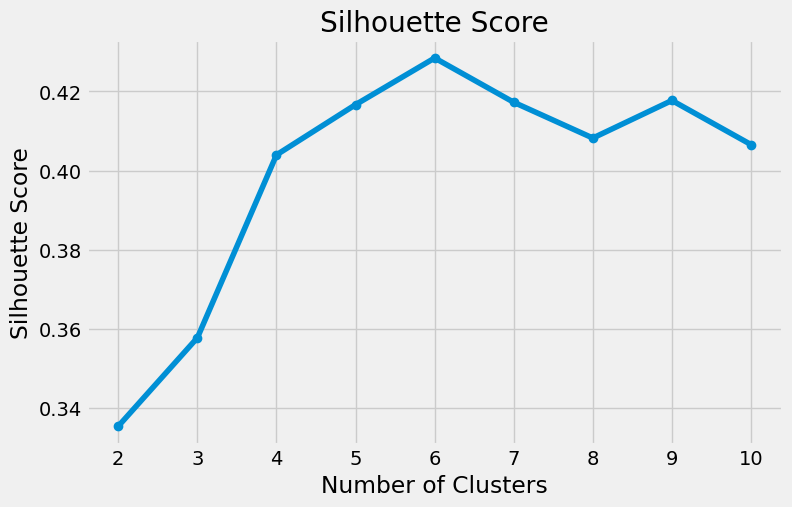

Optimal K: 6


In [31]:
from sklearn.metrics import silhouette_score
def plot_silhouette(X, max_k=10):
    scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        scores.append(silhouette_score(X, labels))
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k+1), scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    optimal_k = np.argmax(scores) + 2
    print(f"Optimal K: {optimal_k}")
    return optimal_k

optimal_k2 = plot_silhouette(X2)
optimal_k3 = plot_silhouette(X3_scaled)

**Note :** Membantu menampilkan dan menilai kualitass clustering kmeans, memilih jumlah cluster terbaik secara objektif, dan menghindari pemilihan jumlah cluster yang terlalu sedikit atau berlebihan. K:5 menggungkan 2 fitur (income dan spending), data pelanggan paling ideal dibagi menjadi 5 cluster berdasarkan fitur-fiturnya. dan K:6 Menggunakan 3 fitur (age, income, dan spending). ketika age dipertimbangkan, maka pembagian pelanggan lebih baiik menjadi 6 cluster.

## **Clustering using K-Means**

**2-feature clustering**

In [32]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42, algorithm='elkan')
df['Cluster2'] = kmeans2.fit_predict(X2_scaled)
centroids2 = kmeans2.cluster_centers_

**Note :** Menjalankan Kmeans cluster 5 pada 2 fitur, menambahkan hasil label cluster ke dataset utama.

In [48]:
db2 = davies_bouldin_score(X2_scaled, df['Cluster2'])
print(f"Davies-Bouldin (2-features): {db2:.3f}")

Davies-Bouldin (2-features): 0.572


In [49]:
print("\nData with cluster labels (2-features):")
display(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster2']].head())


Data with cluster labels (2-features):


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster2
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


**3-feature clustering**

In [33]:
kmeans3 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42, algorithm='elkan')
df['Cluster'] = kmeans3.fit_predict(X3_scaled)
centroids3 = kmeans3.cluster_centers_

**Note :** Menjalankan Kmeans cluster 5 pada 3 fitur, menambahkan faktor age untuk analisi lebih dalam.

In [34]:
db_score = davies_bouldin_score(X3_scaled, df['Cluster'])
print(f"Davies-Bouldin Score: {db_score:.3f}")

Davies-Bouldin Score: 0.875


**Note :** Mengevaluasi kualitas hasil clustering, semakin kecil skor, maka semakin baik hasil cluster.

In [35]:
print("\nData with cluster labels (3-features):")
df.head()


Data with cluster labels (3-features):


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster2,Cluster
0,1,1,19,15,39,4,1
1,2,1,21,15,81,2,1
2,3,0,20,16,6,4,0
3,4,0,23,16,77,2,1
4,5,0,31,17,40,4,1


**Note :** Menampilkan data asli yang sudah dilabeli cluster hasil kmeans.

## **Evaluation & Visualization**

**Assigned to:** Tania Nurindini

**Visualization after normalization**

**Customer Segmentation 2D (2 Features)**

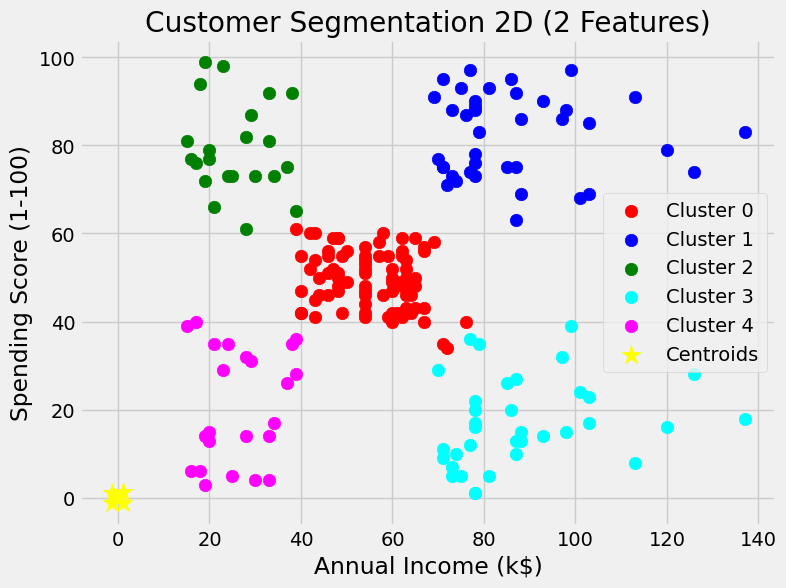

In [36]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    cluster_data = df[df['Cluster2'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=colors[i], label=f'Cluster {i}', s=80)
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=200, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segmentation 2D (2 Features)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Note :** Menampilkan segmentasi pelanggan dalam bentuk grafik 2D berdasarkan 2 fitur income annual income dan spending score.

**Customer Segmentation 2D (3 Features)**

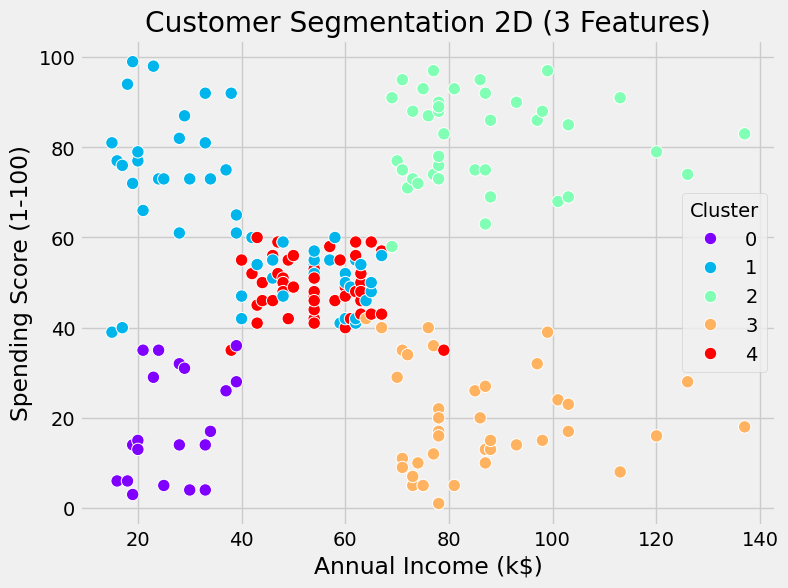

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='rainbow', s=80)
plt.title('Customer Segmentation 2D (3 Features)')
plt.legend(title='Cluster')
plt.show()

**Note :** Hasil visualisasi 2D, 5 cluster dengan 3 fitur (age, annual income, dan spending score).

**Visualization before normalization**

**Customer Segmentation 2D (2 Features)**

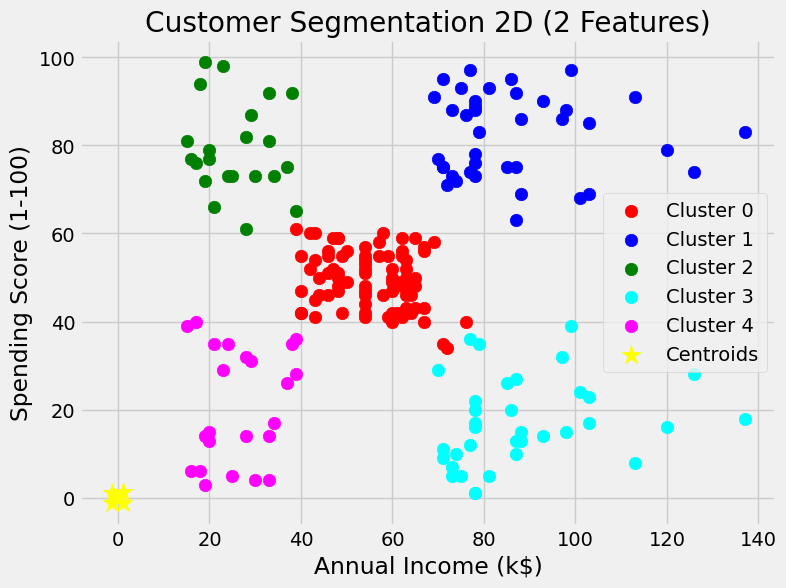

In [38]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    cluster_data = df[df['Cluster2'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=colors[i], label=f'Cluster {i}', s=80)
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=200, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segmentation 2D (2 Features)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Note  :** Clustering 2 fitur (annual income dan spending score) yang divisualisasikan dalam bentuk 2D scatter plot. Pelanggan terbagi dengan baik ke dalam 5 kelompok berbeda (tidak tumpang tindih).

**Customer Segmentation 2D (3 Features)**

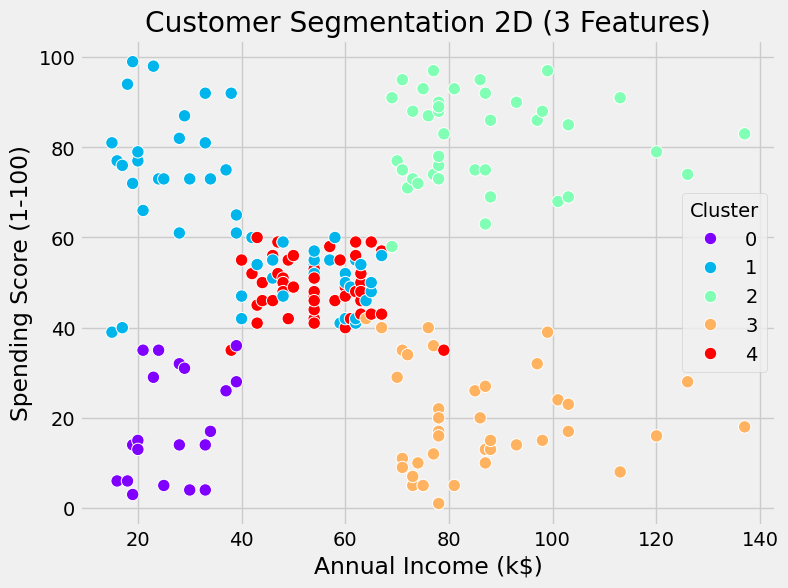

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='rainbow', s=80)
plt.title('Customer Segmentation 2D (3 Features)')
plt.legend(title='Cluster')
plt.show()

**Note :** Clustering 3 fitur (age, annual income, dan spending score) yang divisualisasikan dalam bentuk 2D scatter plot. 3 fitur kurang cocok untuk plot dalam bentuk 2D.

**3D Interactive Clusters (Age, Spending, Income)**

In [40]:
df_plotly = df.copy()
trace1 = go.Scatter3d(
    x=df_plotly['Age'],
    y=df_plotly['Spending Score (1-100)'],
    z=df_plotly['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df_plotly['Cluster'],
        size=20,
        line=dict(color=df_plotly['Cluster'], width=12),
        opacity=0.8
    )
)
layout = go.Layout(
    title='3D Interactive Clusters (Age, Spending, Income)',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income (k$)')
    )
)
fig = go.Figure(data=[trace1], layout=layout)
fig.show()


**Note :** Clustering 3 fitur (age, annual income, dan spending score) yang divisualisasikan dalam bentuk 3D scatter plot.

In [41]:
print("\nAverage per cluster (3-features):")
print()
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()



Average per cluster (3-features):



,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064


**Note :** Menampilkan hasil rata-rata fitur per cluster.

**Boxplots for each feature by cluster**

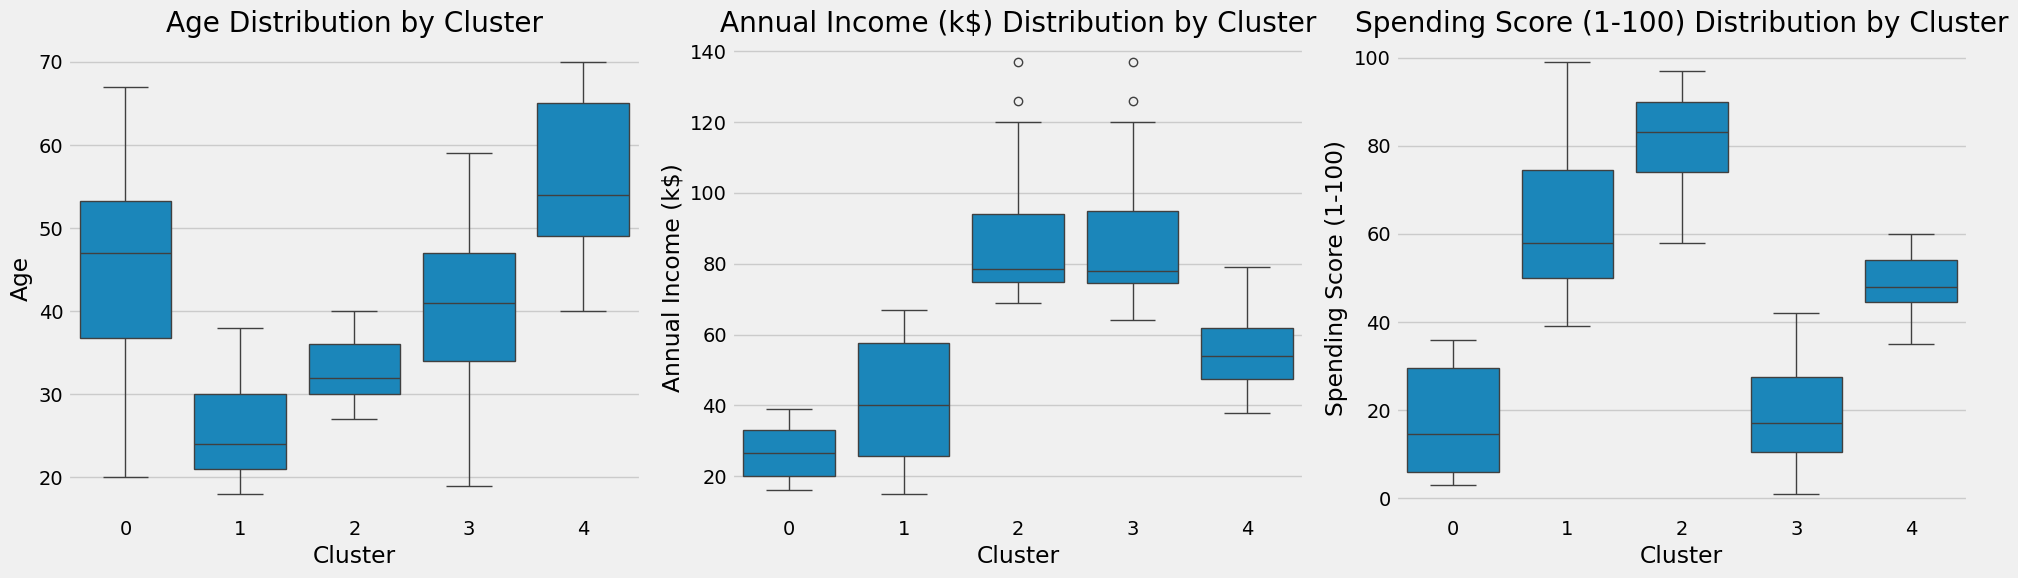

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Cluster')

plt.tight_layout()
plt.show()


**Cluster Sizes**

In [43]:
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


**Feature Standard Deviations per Cluster**

In [44]:
print("\nFeature Standard Deviations per Cluster:")
print(df.groupby('Cluster')[features].std())


Feature Standard Deviations per Cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        11.579815            7.311671               11.935242
1         5.508395           16.815613               16.596130
2         3.857643           16.339036                9.999968
3        10.938054           16.725013               11.610991
4         8.913657            8.818344                6.303825


**Note :** Untuk menghasilkan sebaran data per cluster (boxplt), mengetahui ukuran tiap cluster, dan mengukur konsistensi internal cluster (standar deviasi). Membantu untuk memahami karakteristik dan kualitas segementasi pelanggan.

**Feature Importance in Clustering**

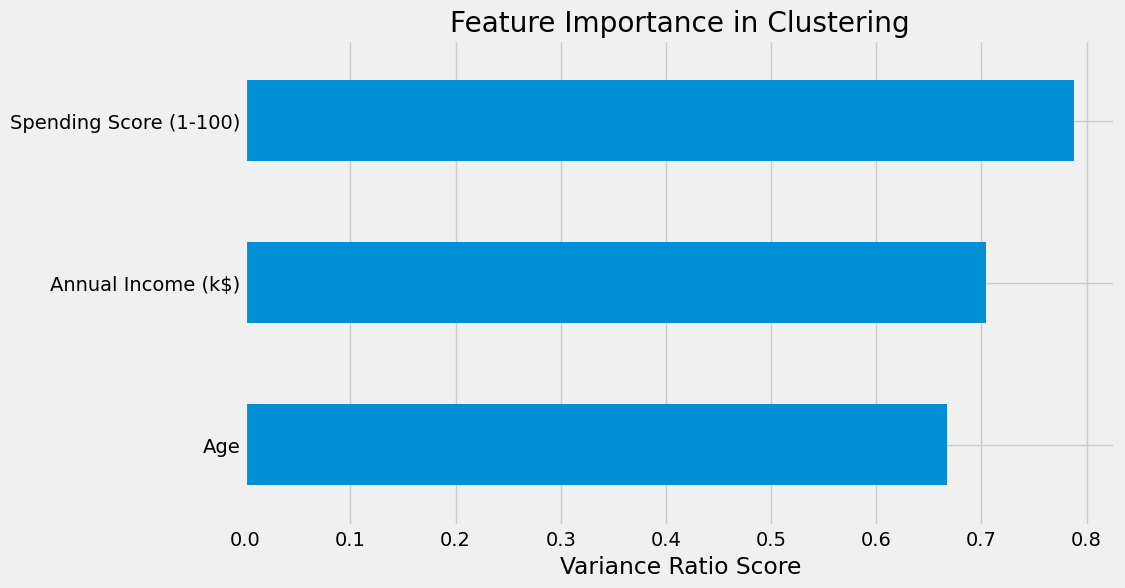


Feature Importance Scores:
Spending Score (1-100)    0.787834
Annual Income (k$)        0.704098
Age                       0.666830
dtype: float64


In [45]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

def calculate_feature_importance(data, features, cluster_labels):
    importances = {}
    for feature in features:
        if cluster_labels not in data.columns:
            print(f"Error: Column '{cluster_labels}' not found in the dataframe.")
            print("Please run the K-means clustering cells first.")
            return None

        cluster_means = data.groupby(data[cluster_labels])[feature].mean()
        global_mean = data[feature].mean()
        between_variance = sum(len(data[data[cluster_labels] == c]) * (m - global_mean) ** 2
                             for c, m in cluster_means.items())
        total_variance = sum((data[feature] - global_mean) ** 2)
        importances[feature] = between_variance / total_variance

    return pd.Series(importances)
if 'Cluster' not in df.columns:
    print("Warning: Clustering hasn't been performed yet.")
    print("Please run the K-means clustering cells first.")
else:
    feature_importance = calculate_feature_importance(df, features, 'Cluster')
    if feature_importance is not None:
        plt.figure(figsize=(10, 6))
        feature_importance.sort_values().plot(kind='barh')
        plt.title('Feature Importance in Clustering')
        plt.xlabel('Variance Ratio Score')
        plt.show()

        print("\nFeature Importance Scores:")
        print(feature_importance.sort_values(ascending=False))

**Detailed Cluster Analysis**

In [46]:
print("Detailed Cluster Analysis:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Profile:")
    print(f"Number of Customers: {len(cluster_data)}")
    print("\nAverage Values:")
    for feature in features:
        mean_val = cluster_data[feature].mean()
        std_val = cluster_data[feature].std()
        print(f"{feature}: {mean_val:.2f} ± {std_val:.2f}")

    print("\nKey Characteristics:")
    young = cluster_data[cluster_data['Age'] < 30].shape[0]
    middle = cluster_data[(cluster_data['Age'] >= 30) & (cluster_data['Age'] < 50)].shape[0]
    senior = cluster_data[cluster_data['Age'] >= 50].shape[0]
    print(f"Age Groups: Young (<30): {young}, Middle (30-50): {middle}, Senior (>50): {senior}")

    low_income = cluster_data[cluster_data['Annual Income (k$)'] < 40].shape[0]
    mid_income = cluster_data[(cluster_data['Annual Income (k$)'] >= 40) & (cluster_data['Annual Income (k$)'] < 80)].shape[0]
    high_income = cluster_data[cluster_data['Annual Income (k$)'] >= 80].shape[0]
    print(f"Income Groups: Low (<40k): {low_income}, Middle (40-80k): {mid_income}, High (>80k): {high_income}")

    low_spending = cluster_data[cluster_data['Spending Score (1-100)'] < 40].shape[0]
    mid_spending = cluster_data[(cluster_data['Spending Score (1-100)'] >= 40) & (cluster_data['Spending Score (1-100)'] < 70)].shape[0]
    high_spending = cluster_data[cluster_data['Spending Score (1-100)'] >= 70].shape[0]
    print(f"Spending Groups: Low (<40): {low_spending}, Middle (40-70): {mid_spending}, High (>70): {high_spending}")
    print("-" * 80)

Detailed Cluster Analysis:

Cluster 0 Profile:
Number of Customers: 20

Average Values:
Age: 46.25 ± 11.58
Annual Income (k$): 26.75 ± 7.31
Spending Score (1-100): 18.35 ± 11.94

Key Characteristics:
Age Groups: Young (<30): 1, Middle (30-50): 12, Senior (>50): 7
Income Groups: Low (<40k): 20, Middle (40-80k): 0, High (>80k): 0
Spending Groups: Low (<40): 20, Middle (40-70): 0, High (>70): 0
--------------------------------------------------------------------------------

Cluster 1 Profile:
Number of Customers: 54

Average Values:
Age: 25.19 ± 5.51
Annual Income (k$): 41.09 ± 16.82
Spending Score (1-100): 62.24 ± 16.60

Key Characteristics:
Age Groups: Young (<30): 39, Middle (30-50): 15, Senior (>50): 0
Income Groups: Low (<40k): 25, Middle (40-80k): 29, High (>80k): 0
Spending Groups: Low (<40): 1, Middle (40-70): 34, High (>70): 19
--------------------------------------------------------------------------------

Cluster 2 Profile:
Number of Customers: 40

Average Values:
Age: 32.88 

**Note :** Analisis mendalam hasil clustering, menghitung statistik utama (mean & std), mengelompokkan pelanggan berdasarkan age, annual income, spending score, dan menyusun deskripsi demografis tiap cluster.

### **Kesimpulan dan Wawasan Bisnis**
Berdasarkan hasil analisis, kita dapat mengidentifikasi beberapa segmen pelanggan yang berbeda secara jelas:

**1. Karakteristik Klaster**
- Menganalisis ciri-ciri spesifik dari setiap klaster menggunakan nilai rata-rata dan distribusinya  
- Mengidentifikasi faktor utama yang membedakan antar klaster  

**2. Implikasi Bisnis**
- Merekomendasikan strategi pemasaran yang lebih terarah untuk setiap segmen  
- Menyarankan modifikasi produk/layanan berdasarkan karakteristik klaster  
- Mengidentifikasi peluang potensial untuk meningkatkan keterlibatan pelanggan  

**3. Performa Model**
- Mengevaluasi efektivitas hasil klasterisasi menggunakan metrik validasi  
- Menilai apakah jumlah klaster yang dipilih sudah sesuai  
- Mempertimbangkan potensi peningkatan dalam proses segmentasi  
